# 第二章 深度学习基础

从本章开始，我们将探索深度学习的奥秘。作为机器学习的⼀类，深度学习通常基于神经⽹络模型逐级表⽰越来越抽象的概念或模式。我们先从**线性回归**和`softmax`回归这两种单层神经⽹络⼊⼿，简要介绍机器学习中的基本概念。然后，我们由单层神经⽹络延伸到多层神经⽹络，并通过**多层感知机**引⼊深度学习模型。在观察和了解了模型的过拟合现象后，我们将介绍深度学习中应对过拟合的常⽤⽅法：**权重衰减**和**丢弃法**。接着，为了进⼀步理解深度学习模型训练的本质，我们将详细解释**正向传播**和**反向传播**。掌握这两个概念后，我们能更好地认识深度学习中的数值稳定性和初始化的⼀些问题。最后，我们通过⼀个深度学习应⽤案例对本章内容学以致⽤。

在本章的前⼏节，我们先介绍单层神经⽹络：线性回归和`softmax`回归。

## 2.1 线性回归

线性回归输出是⼀个连续值，因此适⽤于回归问题。回归问题在实际中很常⻅，如预测房屋价格、⽓温、销售额等连续值的问题。与回归问题不同，分类问题中模型的最终输出是⼀个离散值。我们所说的图像分类、垃圾邮件识别、疾病检测等输出为离散值的问题都属于分类问题的范畴，`softmax`回归则适⽤于分类问题。

由于线性回归和`softmax`回归都是单层神经⽹络，它们涉及的概念和技术同样适⽤于⼤多数的深度学习模型。我们⾸先以线性回归为例，介绍⼤多数深度学习模型的基本要素和表⽰⽅法。

### 2.1.1 线性回归的基本要素

我们以⼀个简单的房屋价格预测作为例⼦来解释线性回归的基本要素。这个应⽤的⽬标是预测⼀栋房⼦的售出价格(元)。我们知道这个价格取决于很多因素，如房屋状况、地段、市场⾏情等。为了简单起⻅，这⾥我们假设价格只取决于房屋状况的两个因素，即⾯积(平⽅⽶)和房龄(年)。接下来我们希望探索价格与这两个因素的具体关系。

**模型**

设房屋的⾯积为$x_1$，房龄为$x_2$，售出价格为$y$。我们需要建⽴基于输⼊$x_1$和$x_2$来计算输出$y$的表达式，也就是模型(`model`)。顾名思义，线性回归假设输出与各个输⼊之间是线性关系，如下公式(2-1-1)所示：

$$
\hat{y}=x_1\omega_1+x_2\omega_2+b \tag{2-1-1}
$$

其中$\omega_1$和$\omega_2$是权重(`weight`)，$b$是偏差(`bias`)，且均为标量。它们是线性回归模型的参数(`parameter`)。模型输出$\hat{y}$是线性回归对真实价格$y$的预测或估计。我们通常允许它们之间有⼀定误差。

**模型训练**

接下来我们需要通过数据来寻找特定的模型参数值，使模型在数据上的误差尽可能小。这个过程叫作模型训练(`model training`)。下⾯我们介绍模型训练所涉及的3个要素。

**训练数据**

我们通常收集⼀系列的真实数据，例如多栋房屋的真实售出价格和它们对应的⾯积和房龄。我们希望在这个数据上⾯寻找模型参数来使模型的预测价格与真实价格的误差最小。在机器学习术语⾥，该数据集被称为训练数据集(`training data set`)或训练集(`training set`)，⼀栋房屋被称为⼀个样本(`sample`)，其真实售出价格叫作标签(`label`)，⽤来预测标签的两个因素叫作特征(`feature`)。特征⽤来表征样本的特点。

假设我们采集的样本数为$n$，索引为$i$的样本的特征为$x_1^i$和$x_2^i$，标签为$y^i$。对于索引为$i$的房屋，线性回归模型的房屋价格预测表达式如下公式(2-1-2)。

$$
\hat{y}^i=x_1^i\omega_1+x_2^i\omega_2+b\tag{2-1-2}
$$

**损失函数**

在模型训练中，我们需要衡量价格预测值与真实值之间的误差。通常我们会选取一个非负数作为误差，且数值越小表示误差越小。一个常用的选择是平方函数。它通过公式(2-1-3)评估索引为$i$的样本误差。

$$
\ell^i(\omega_1,\omega_2,b)=\frac{1}{2}(\hat{y}^i-y^i)^2\tag{2-1-3}
$$

其中常数$\frac{1}{2}$使对平方项求导后的常熟系数为1，这样在形式上稍微简单一些。显然，误差越小表示预测价格与真实价格越相近，且当二者相等时误差为零(但在回归中，最好不要出现误差全部为零的情况，因为很大程度上说明此时严重过拟合，那么泛化能力则可能被严重限制)。

给定训练数据集，这个误差只与模型参数相关，因此我们将它记为以模型参数为参数的函数。在机器学习里，将衡量误差的函数称为损失函数(`loss function`)。这里使用的平方误差函数也被称为平方损失(`square loss`)。

通常，我们用训练数据集中所有样本误差的平均来衡量模型预测的质量，如公式(2-1-4)所示。

$$
\ell(\omega_1,\omega_2,b)=\frac{1}{n}\sum_{i=1}^n\ell^i(\omega_1,\omega_2,b)=\frac{1}{n}\sum_{i=1}^n\frac{1}{2}(x_1^i\omega_1+x_2^i\omega_2+b-y^i)^2\tag{2-1-4}
$$

在模型训练中，我们希望找出一组模型参数，记为$\omega_1^*,\omega_2^*,b^*$，来使训练样本平均损失最小：

$$
\omega_1^*,\omega_2^*,b*=\underset{\omega_1,\omega_2,b}{argmin}\ell(\omega_1,\omega_2,b)\tag{2-1-5}
$$

**优化算法**

当模型和损失函数形式较为简单时，上面的误差最小化问题的解可以直接用公式表达出来。这类解叫做解析解(`analytical solution`)。本节使用的线性回归和平方误差便属于该范围。然而，大多数深度学习模型并没有解析解，只能通过优化算法有限次迭代模型参数来尽可能降低损失函数的值。这类解叫做数值解(`numerical solution`)。

在求数值解的优化算法中，小批量随机梯度下降(`mini-batch stochastic gradient descent`)在深度学习中被广泛使用。它的算法很简单：先选取一组模型参数的初始值，如随机选取；接下来对参数进行多次迭代，使每次迭代都可能降低损失函数的值。在每次迭代中，先随机均匀采样一个由固定数目训练数据样本所组成的小批量(`mini-batch`)$\mathcal{B}$，然后求小批量中数据样本的平均损失有关模型参数的导数(梯度)，最后用此结果与预先设定的一个正数的乘积作为模型参数在本次迭代的减小量。

在训练本节讨论的线性回归模型过程中，模型的每个参数将作如下迭代：
$$
\omega_1 \leftarrow \omega_1-\frac{\eta}{|\mathcal{B}|}\sum_{i\in\mathcal{B}}\frac{\partial \ell^i(\omega_1,\omega_2,b)}{\partial \omega_1}=\omega_1-\frac{\eta}{|\mathcal{B}|}\sum_{i\in\mathcal{B}}x_1^i(x_1^i\omega_1+x_2^i\omega_2+b-y^i),\\
\omega_2 \leftarrow \omega_2-\frac{\eta}{|\mathcal{B}|}\sum_{i\in\mathcal{B}}\frac{\partial \ell^i(\omega_1,\omega_2,b)}{\partial \omega_2}=\omega_2-\frac{\eta}{|\mathcal{B}|}\sum_{i\in\mathcal{B}}x_2^i(x_1^i\omega_1+x_2^i\omega_2+b-y^i),\\
b \leftarrow b-\frac{\eta}{|\mathcal{B}|}\sum_{i\in\mathcal{B}}\frac{\partial \ell^i(\omega_1,\omega_2,b)}{\partial b}=b-\frac{\eta}{|\mathcal{B}|}\sum_{i\in\mathcal{B}}x_2^i(x_1^i\omega_1+x_2^i\omega_2+b-y^i).
$$

在上式中，$|\mathcal{B}|$代表每个小批量中的样本个数(批量大小，`batch size`)，$\eta$称作学习率(`learning rate`)，一般取值在0到1之间。

需要强调的是，这里的批量大小和学习率的值是人为设定的，并不是通过模型训练学出来的，因此叫作超参数(`hyperparameter`)。我们通常所说的“调参”指的正是调节超参数，例如通过反复试错来找到超参数合适的值。在少数情况下，超参数也可以通过模型训练学出。

**模型预测**

模型训练完成后，我们将模型参数$\omega_1,\omega_2,b$在优化算法停止时的值分别记作$\hat{\omega}_1,\hat{\omega}_2,\hat{b}$。需要注意的是，算法停止时得到的值并不一定就是最小化损失函数的最优解$\omega_1^*,\omega_2^*,b^*$，而是对最优解的一个近似。然后，我们就可以使用训练得到的线性回归模型$x_1\hat{\omega}_1+x_2\hat{\omega}_2+\hat{b}$来估算训练数据集以外任意的结果。这里的估算也叫做模型预测、模型推断或模型测试。

### 2.1.2 线性回归的表示方法

上面我们阐述了线性回归的模型表达式、训练和预测。下面我们解释线性回归与神经网络的联系，以及线性回归的矢量计算表达式。

**神经网络图**

在深度学习中，我们可以使用神经网络图直观地表现模型结构。为了更清晰地展示线性回归作为神经网络的结构，我们下面会对每个网络展示其网络图，当然，手动绘图过于费时，我们这里展示跳过，但不影响后面内容的学习和理解。

**矢量计算表达式**

在模型训练或预测时，我们常常会同时处理多个数据样本并用到矢量计算。在介绍线性回归的矢量计算表达式之前，我们应该先了解两个向量相加的方法。

在其他语言中，一般被叫做数组，而不是向量，而向量应该是数学当中特有的叫法，同时矩阵、张量等也是如此。在`python,matlab`等科学计算的语言中，是可以直接进行矩阵论中的相关计算，和数学的计算一致。同时，这种直接的矩阵运算，相比普通的数组计算节省了大量时间。

下面，我们在`python`中使用两种方法进行计算，同时查看两种方法计算所需耗时。

In [1]:
from time import time
import torch

a = torch.ones(size=(1000, 1))
b = torch.ones(size=(1000, 1))

下面首先使用普通的计算，就是对这两个张量逐一做标量加法。

In [12]:
start = time()
c = torch.zeros(size=(1000, 1))
for i in range(1000):
    c[i,0] = a[i, 0] + b[i, 0]
time() - start

0.015667200088500977

下面我们使用矩阵加法，也就是数学意义上的，直接将这两个张量做矢量加法。

In [13]:
start = time()
d = a + b
time() - start

0.0

相对而言，后者两个张量的计算耗时几乎可以忽略不计。因此，在计算时，为了提示计算效率，我们应该尽可能地采用矢量计算地方式对张量进行计算。

我们以房屋预测计算原理为例，当我们对训练集中的三个样本进行预测(索引分别使用1、2、3表示)，将可以表示成下面形式：

$$
\hat{y}^1=x_1^1\omega_1+x_2^1\omega_2+b,\\
\hat{y}^2=x_1^2\omega_1+x_2^2\omega_2+b,\\
\hat{y}^3=x_1^3\omega_1+x_2^3\omega_2+b.
$$

上面上标表示对应样本，$x_i$表示房价预测的数据特征，在当前的示例中，我们假设有两个特征；$\omega_i,b$则是通过大量数据训练得到的对应特征权重和偏执。

>所有的预测，或者神经网络，个人认为都可以看作是通过特定公式计算而来，而公式中各参数都是通过大量的自动计算，得到最符合总体趋势的结果作为参数，而后根据已有的规律，应用到新的场景中。

现在，我们将上面的三个灯饰转化成矢量计算，即转化成矩阵运算的格式。设：

$$
\pmb{\hat{y}}=\begin{bmatrix}\hat{y}^1\\ \hat{y}^2\\ \hat{y}^3 \end{bmatrix},
\pmb{X}=\begin{bmatrix}x_1^1&x_2^1\\ x_1^2&x_2^2\\ x_1^3&x_2^3 \end{bmatrix},
\pmb{\omega}=\begin{bmatrix}\omega_1\\ \omega_2 \end{bmatrix}.
$$

对房屋进行预测的矢量计算表达式(矩阵运算表达式)为：$\pmb{\hat{y}}=\pmb{X\omega}+b$。其中加法使用了广播机制，如下所示：

In [10]:
a = torch.ones(size=(1, 3))
b = 10
a + b

tensor([[11., 11., 11.]])

在这里，`torch`中的`size`是一个`tuple`类型，也就是至少是一个二维矩阵。例如`[1,1,1]`，我们可以认为它是一行三列，但在`torch`按照一行三列进行生成，那就是有两个维度的出现(如上面示例)，而不是以数组的形式(`[1,1,1]`)出现。

倘若我们需要将其展平，变成数组形式。那么可以使用`reshape`或者`flatten`。如下所示：

In [12]:
a.flatten()

tensor([1., 1., 1.])

In [13]:
a.reshape(-1)

tensor([1., 1., 1.])

其实，在参考的书籍之中，还重写了对应损失函数以及小批量梯度下降公式等，但我觉得，在初学阶段，并不需要对此过于深究，毕竟，数学公式是枯燥得，初学者大概率不能一次看懂。但是，并不是看不懂就不能进行学习，当然，公式是对算法最底层原理的朴素描述，能看懂并理解当然再好不过了。但我更愿意将这些底层的，朴素的东西放在最后，在你对模型都有了一个葫芦模样了解之后。

**小结**

- 和大多数的网络模型一样，这种线性回归单层神经网络基本要素包括了模型、训练数据、损失函数和优化算法。
- 在计算时，应尽可能采用矢量计算，以提升计算效率。

## 2.2 线性回归的实现

在了解线性回归背景知识之后，现在我们可以动手实现它了。尽管强的的深度学习框架可以减少大量的重复性工作，但太过于依赖它提供的便利会导致我们很难深入理解深度学习原理。因此，在下面的实现中，我们将会尽可能使用基础的功能实现一个线性回归的训练任务。

首先，导入我们需要使用的包，其中`matplotlib`是`python`的一个强大的绘图工具包，我们通过导入该包，绘制相对应的图像。

### 2.2.1 生成数据集

我们构造一个简单的人工训练数据集，它可以使我们能够直观比较学到的参数和真实的模型参数的区别。设训练数据集样本数为1000，输入个数(特征数)为2。给定随机生成的批量样本特征$\pmb{X}\in \mathcal{R}^{1000\times 2}$，我们使用$\pmb{\omega}=[3,-3]^T$，偏差$b=2$作为目标模型，通过原模型以及一个随机噪声项$\pmb{\epsilon}$来生成标签,其中随机噪声项形状与样本特征大小一致：

$$
\pmb{y}=\pmb{X\omega}+b+\pmb{\epsilon}
$$

在这里，噪声项$\pmb{\epsilon}$服从均值为0，标准差为0.01的正态分布。

>噪声代表了数据集中无意义的干扰，在大多数的训练数据中，都存在噪声。

下面，我们生成数据集。

In [29]:
import torch

num_inputs = 2
num_examples = 1000
true_omega = torch.tensor([[3., -3.]])
true_b = 2
features = torch.normal(mean=0.,std=1, size=(num_examples, num_inputs))
labels = torch.mm(features, true_omega.T) + true_b
labels += torch.normal(mean=0.,std=0.01, size=labels.shape)

在上面，`features`是一个1000行2列的张量(矩阵)，而`labels`则是一个1000行1列的张量(矩阵)，如下所示：

In [2]:
features.shape

torch.Size([1000, 2])

In [3]:
labels.shape

torch.Size([1000, 1])

下面我们通过绘图工具`matplotlib`绘制两个特征数据点随`labels`的分布。

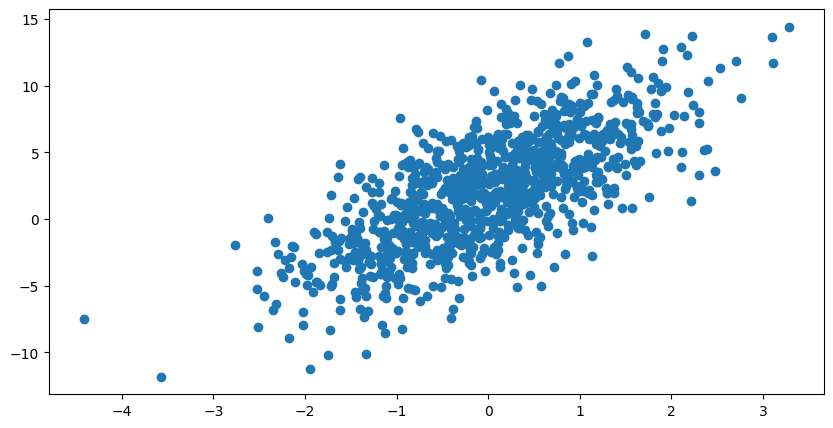

In [4]:
import matplotlib.pyplot as plt

# 设置图的尺寸
plt.figure(figsize=(10, 5))
plt.scatter(features[:, 0].numpy(), labels.numpy())
plt.show()

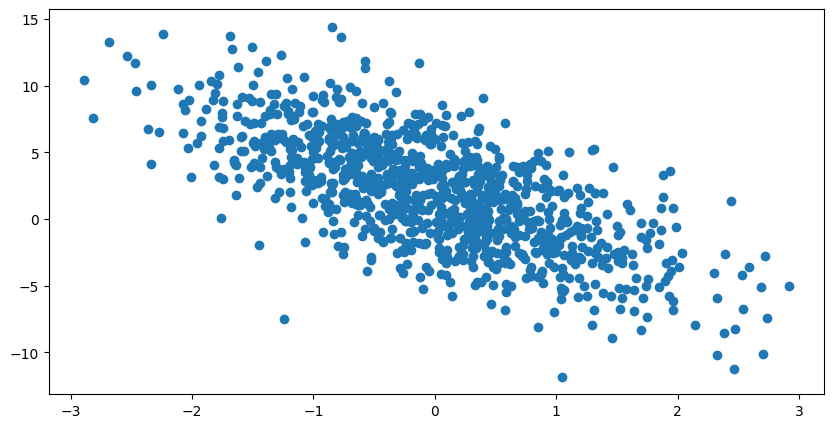

In [5]:
plt.figure(figsize=(10, 5))
plt.scatter(features[:, 1].numpy(), labels.numpy())
plt.show()

### 2.2.2 读取数据

在训练模型时，我们需要遍历数据集并不断读取小批量数据样本。这里我们定义一个函数：它每次返回`batch_size`(批量大小)个随机样本的特征和标签。

In [27]:
import random
import numpy as np

def dataLoader(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # 样本读取是随机的，因此打乱样本顺序
    for i in range(0, num_examples, batch_size):
        j = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield torch.index_select(features, 0, j), torch.index_select(labels, 0, j)

下面我们通过`dataLoader`读取一个小批量样本并打印，设置每个批量十个样本。

In [30]:
batch_size = 10

for data_x, data_y in dataLoader(batch_size, features, labels):
    print(data_x)
    print(data_y)
    break

tensor([[-0.4315,  1.1101],
        [-1.5671,  0.0423],
        [ 0.1464,  0.6300],
        [-0.5394,  0.4615],
        [ 0.7087,  1.5384],
        [ 0.9384,  3.2569],
        [-0.7667, -1.0963],
        [ 1.3686,  0.5160],
        [-2.7041, -1.1738],
        [-0.5380, -0.4126]])
tensor([[-2.6111],
        [-2.8197],
        [ 0.5275],
        [-1.0139],
        [-0.4833],
        [-4.9584],
        [ 2.9927],
        [ 4.5577],
        [-2.6025],
        [ 1.6386]])


我们可以再次查看样本的形状。

In [8]:
data_x.shape

torch.Size([10, 2])

In [9]:
data_y.shape

torch.Size([10, 1])

### 2.2.3 初始化模型参数

我们将权重初始化成均值为0、标准差为0.01的正态随机数，偏差则初始化为0。

In [32]:
w = torch.normal(mean=0, std=0.01, size=(num_inputs, 1), requires_grad=True)
b = torch.zeros(size=(1,), requires_grad=True)

在模型训练时，需要对参数进行梯度求解，因此我们需要告诉机器，上面两个参数时需要求解梯度的。

In [11]:
w.requires_grad = True
b.requires_grad = True

### 2.2.4 定义模型

下面我们进行线性回归模型的实现。

模型计算的公式为：

$$
\pmb{\hat{y}} = \pmb{X\omega}+b
$$

In [23]:
def linearRegression(x, w, b):
    return torch.mm(x, w) + b

### 2.2.5 定义损失函数

我们使用最常用最基本的损失函数作为本例中的损失函数——平方损失函数。下面我们实现平方损失函数。

一般而言，平方损失函数为如下形式：

$$
\ell(\pmb{\omega},b)=\frac{(\hat{y}-y)^2}{2}
$$

但由于在本例中，我们使用的小批量训练，因此损失函数计算方法稍有变化，函数公式将如下所示：

$$
\ell(\pmb{\omega},b)=\frac{(\pmb{\hat{y}}-\pmb{y})^T(\pmb{\hat{y}}-\pmb{y})}{2}
$$

>1. 需要注意的是，实现时不要过分拘泥于具体的公式，公式只是模型的表达方式，简洁的阐明算法的执行规则。比如在小批量数据处理时，如果$(\pmb{\hat{y}}-\pmb{y})$的`shape=[1,100]`，那么上面的公式就需要稍微变化，变为下面的格式：
$$
\ell(\pmb{\omega},b)=\frac{(\pmb{\hat{y}}-\pmb{y})(\pmb{\hat{y}}-\pmb{y})^T}{2}
$$
>2. 在小批量计算时，你会发现，我们计算得到的是总损失，因此，如果你想得到平均的损失，那么损失函数还可以写成如下格式：
$$
\ell(\pmb{\omega},b)=\frac{(\pmb{\hat{y}}-\pmb{y})(\pmb{\hat{y}}-\pmb{y})^T}{2\times BatchSze}
$$
其中`BatchSize`表示每批数据的数目。

不论是何总形式，我们的所希望的就是让损失函数不断地变小，这是永恒不变的目标。因此在本例中，是否有`BatchSize`对优化地最终结果并不重要，当然，如果加上`BatchSize`，那么损失函数地值将会更小，明显上数据会更好看。

In [24]:
def squared_loss(y_hat, y):
    loss_y = (y_hat - y.reshape(y_hat.shape))
    return  torch.mm(loss_y.T, loss_y) / 2

### 2.2.6 定义优化算法

下面我们实现前面所讲的小批量随机梯度下降算法。它通过不断迭代模型参数来优化损失函数。这里自动求梯度模块计算得来的梯度是一个批量样本的梯度和。我们将它除以批量大小从而得到平均值。

In [34]:
def SGD(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

### 2.2.7 训练模型

在训练中，我们将多次迭代模型，并通过梯度求导不断地调整模型参数，使得模型输出与真实输出之间的误差最小。下面我们开始训练模型，训练模型其实是一个很有序的过程，简单概括，我们可以概括成如下流程：

1. 将数据和参数输入到模型并保留结果；
2. 将结果和样本标签输入到损失函数求解损失；
3. 对损失进行梯度求解；
4. 对参数进行随机梯度下降。

每一次执行上面的步骤，参数就会被进一步优化，同时损失函数计算得到的损失就会进一步降低，当然，损失降到后期将会在一个最小值点进行波动，因此随着迭代次数的增加，损失在大趋势上是减少的。

下面我们开始模型的训练。

In [35]:
lr = 0.03
batch_size = 10
num_epochs = 3
lin_reg = linearRegression
loss = squared_loss

for epoch in range(num_epochs):
    for x, y in dataLoader(batch_size, features, labels):
        y_hat = lin_reg(x, w, b)
        l = loss(y_hat, y)
        l.backward(torch.ones_like(l))
        with torch.no_grad():
            SGD([w, b], lr, batch_size)
        w.grad.data.zero_()
        b.grad.data.zero_()
    y_hat = lin_reg(features, w, b)
    train_l = loss(y_hat, labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().detach().numpy()))

epoch 1, loss 18.723055
epoch 2, loss 0.082851
epoch 3, loss 0.050664


训练完成，我们接下来查看训练的结果和真实数据集生成的结果。结果证明，训练的最终结果和实际生成数据的参数基本一致。

In [36]:
print(true_omega, true_b)

tensor([[ 3., -3.]]) 2


In [37]:
print(w, b)

tensor([[ 2.9994],
        [-2.9994]], requires_grad=True) tensor([1.9993], requires_grad=True)


## 2.3 线性回归的简洁实现

随着深度学习框架的不断发展，搭建深度学习算法变得越来越便利。在学习实践中，后来的学习者通常可以借助深度学习框架通过简洁的代码来实现同样的模型。接下来，我们将介绍如何使用`Pytorch`来简单实现线性回归算法。

### 2.3.1 数据集的生成

与上一小节操作类似，我们利用相同的方式生成数据集，其中`features`市训练数据特征，`labels`则是数据标签。

In [14]:
import torch

num_inputs = 2
num_examples = 1000
true_omega = torch.tensor([[2, -3.4]])
true_b = 4.2
features = torch.normal(mean=0.,std=1, size=(num_examples, num_inputs))
labels = torch.mm(features, true_omega.T) + true_b
labels += torch.normal(mean=0.,std=0.01, size=labels.shape)

下面我们通过绘图工具`matplotlib`绘制两个特征数据点随`labels`的分布。

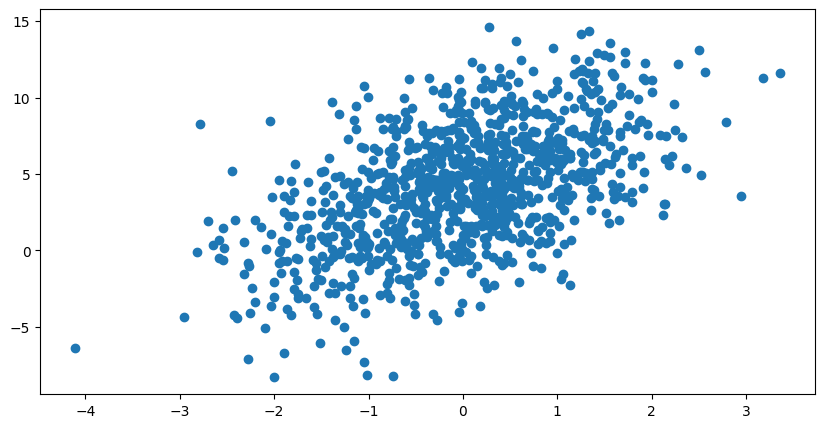

In [15]:
import matplotlib.pyplot as plt

# 设置图的尺寸
plt.figure(figsize=(10, 5))
plt.scatter(features[:, 0].numpy(), labels.numpy())
plt.show()

### 2.3.2 读取数据

在上一节中，我们通过编写`dataLoader`读取数据，在`Pytorch`中，也有已经封装好的数据读取函数，名称也一样，但是需要做一些不同的步骤。首先封装`features`和`labels`，接着在封装好的数据集中进行读取。

In [16]:
from torch.utils import data

batch_size = 10
# 将数据和标签进行组合
dataset = data.TensorDataset(features, labels)
# 随机的读取小批量数据
data_iter = data.DataLoader(dataset, batch_size, shuffle=True)

这个操作和上一小节类似，就是随机的读取小批量数据样本。下面我们展示其中一个批量的数据集样本。

In [17]:
for x, y in data_iter:
    print(x, y)
    break

tensor([[-0.2358, -0.2727],
        [ 0.1956,  0.3114],
        [ 1.3836,  0.8860],
        [ 0.0499,  0.8113],
        [-0.5324,  1.2172],
        [-0.1784, -0.2856],
        [-1.1996,  0.2181],
        [ 1.3405, -2.2044],
        [ 0.6018,  0.5982],
        [-0.5861, -1.0458]]) tensor([[ 4.6517],
        [ 3.5121],
        [ 3.9568],
        [ 1.5422],
        [-0.9977],
        [ 4.8219],
        [ 1.0633],
        [14.3803],
        [ 3.3566],
        [ 6.5958]])


### 2.3.3 定义模型

从上一节依据线性回归理论从零定义模型参数，并细致的描述了线性回归模型计算原理。但当模型结构变得更加复杂时，使用上面的形式去完成这些定义、训练步骤将变得更加繁琐。其实在目前流行的深度学习框架都提供了大量预定义的层，这种变化使得我们只需要关注使用哪些层来构造模型。下面将介绍如何使用`Pytorch`更简洁的定义线性回归。

首先，导入`nn`模块。实际上，`nn`是`neural network`(神经网络)的缩写。顾名思义，该模块定义了大量神经网络的层。我们先定义一个模型变量`net`，它是一个`Sequential`实例。在所有的框架中，`Sequential`实例可以看作一个串联各个层的容器。在构造模型时，我们在该容器中依次添加各种层。当给定输入数据时，容器中的每一层将依次计算并将输出作为下一层的输入。

In [1]:
from torch import nn

net = nn.Sequential()

在单层神经网络中，线性回归输出层中的神经元和输入层中的各个输入是完全连接的，如下图所示。因此，线性回归的输入层又叫全连接层。在`Pytorch`中，全连接层是一个`Linear`实例。在`Pytorch`中，我们需要明确定义该全连接输入个数和输出个数。

![img-2-3-1](./images/2-3-1.png)

In [6]:
net.add_module("lin1",nn.Linear(2, 1))

在其他的深度学习框架中，已经轻松到无需我们自己说明输入个数，而只需明确输出个数，框架会自动根据初始数据以及对应层输出个数来推断输入个数。但是在`Pytorch`中，则需要我们认为的输入每一层的输入和输出，这在一定程度上需要使用者对深度学习网络模型的理论更加了解。

### 2.3.4 初始化模型参数

在使用`net`前，我们需要初始化模型参数，如线性回归模型中的权重和偏置。下面我们对其进行初始化，将模型的权重初始化为随机采样于均值为`0`、标准差为`0.01`的正态分布，偏差参数设置为`0`。

In [7]:
for module in net.modules():
    if isinstance(module, nn.Linear):
        module.weight.data.normal_(mean=0, std=0.01)
        module.bias.data.fill_(0.0)

### 2.3.5 定义损失函数

在`Pytorch`中，损失函数同样被定义在`nn`模块中，下面将其提供的平方损失作为此模型的损失函数。

In [22]:
criterion = nn.MSELoss()

### 2.3.6 定义优化算法

同样的，我们也无需实现小批量随机梯度下降。在`Pytorch`中，有专门的一个`optim`优化器库，其中给我们提供了大量的优化器。下面我们创建一个随机梯度下降的优化器，同时指定学习率为`0.03`。该优化算法将用迭代`net`实例所有通过`add_module`函数嵌套的层所包含的全部参数。这些参数可以通过`parameters`函数来获取。

In [13]:
from torch import optim

optimizer = optim.SGD(net.parameters(), lr=0.03)

### 2.3.7 模型训练

下面我们使用上面定义好的模型、损失函数以及优化器进行一次完整的训练。

In [26]:
num_epoches = 3
for epoch in  range(1, num_epoches + 1):
    for inputs, label in data_iter:
#         inputs, label = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, label)
        loss.backward()
        optimizer.step()
    l = criterion(net(features), labels)
    print('epoch %d, loss: %f' % (epoch, l.mean().detach().numpy()))

epoch 1, loss: 0.000096
epoch 2, loss: 0.000095
epoch 3, loss: 0.000095


下面我们分别比较训练模型的最终参数以及真实模型的参数。我们通过访问`net`中所需特定的层来获取其权重(`weight`)以及偏置(`bias`)。从下面的结果可以看出，训练的结果的最终参数与真实参数十分接近。

In [31]:
params = net.state_dict()
print('true_weight: ' + str(true_omega))
print('net_weight: ' + str(params['lin1.weight']))

true_omega: tensor([[ 2.0000, -3.4000]])
net_omega: tensor([[ 2.0002, -3.4005]])


In [32]:
print('true_bias: ' + str(true_b))
print('net_bias: ' + str(params['lin1.bias']))

true_bias: 4.2
net_bias: tensor([4.2001])


#### 小结

- 使用`Pytorch`可以快速的搭建模型并进行训练。
- 在`Pytorch`中，`nn`中定义了大量的神经网络层以及损失函数以供使用，而在`optim`中则提供了主流的优化器。

## 2.4 `softmax`回归

前几节介绍的线性回归模型适用于输出为连续值得情景。在另一类情景中，模型输出可以是一个像图像类别这样的离散值。对于这样的离散值预测问题，我们可以使用诸如`softmax`回归在内的分类模型。和线性回归不同，`softmax`回归的输出单元从一个变成了多个，且引入的`softmax`运算使输出更合适离散值的预测和训练。本节以`softmax`回归模型为例，介绍神经网络中的分类模型。

### 2.4.1 分类问题

接下来我们可以考虑一个简单的图像分类问题，其输入图像的高和宽均为`2`像素，且色彩为灰度。这样每个像素值都可以用一个标量表示。我们将图像中的`4`像素分别记为$x_1,x_2,x_3,x_4$。假设训练数据集中图像的真实标签为狗、猫或鸡(假设可以用`4`像素表示出这3种动物)，这些标签分别对应离散值$y_1,y_2,y_3$。

我们通常使用离散的数值来表示类别，例如$y_1=1,y_2=2,y_3=3$。如此，一张图像的标签为`1`、`2`和`3`这三个数值中的一个。虽然我们仍然可以使用回归模型来进行建模，并将预测值就近定点化到`1`、`2`和`3`这三个离散值之一，但这种连续值到离散值的转化通常会影响到分类质量。因此我们一般使用更加合适的离散值输出模型来解决分类问题。

### 2.4.2 `softmax`回归模型

`softmax`回归跟线性回归一样将输入特征与权重做线性叠加。与线性回归的一个主要不同在于，**`softmax`回归的输出值个数等于标签里的类别数**。因为一共有`4`中特征和`3`种输出动物类别，所以权重包含`12`个标量(下面公式中带下标的$\omega$)、偏差包含`3`个标量(带下标的$b$)，且对每个输入计算$o_1,o_2,o_3$这三个输出，公式如下所示：

$$
\begin{cases}
o_1=x_1\omega_{11}+x_2\omega_{21}+x_3\omega_{31}+x_4\omega_{41}+b_1,\\
o_2=x_1\omega_{12}+x_2\omega_{22}+x_3\omega_{32}+x_4\omega_{42}+b_2,\\
o_3=x_1\omega_{13}+x_2\omega_{23}+x_3\omega_{33}+x_4\omega_{43}+b_3,\\
\end{cases}
$$

下图用神经网络图描绘了上面的计算，当然，省略了权重和偏置的计算，只保留输入到输出的关系。`softmax`回归与线性回归⼀样，也是⼀个单层神经⽹络。由于每个输出$o_1,o_2,o_3$的计算都要依赖于所有的输⼊$x_1, x_2, x_3, x_4$，`softmax`回归的输出层也是⼀个全连接层。

![img2-4-1](./images/2-4-1.png)

当然，为了便于理解，我们也可以将神经网络图绘制成下面的模式。

![img2-4-2](./images/2-4-2.png)

但是从上面可以看出，随着网络层的复杂度的变化，神经网络图将会变得越来越繁杂，因此在标准的神经网络图表示中，都会隐去权重和偏置。

##### `softmax`运算

既然分类问题需要得到离散的预测输出，一个简单的办法是将输出值$o_i$作为预测类别是$i$的置信度，并将值最大的输出对应的类别作为预测输出，即输出$\underset{i}{argmax}\;o_i$。

例如，如果$o_1,o_2,o_3$分别为`0.1,10,0.1`，由于$o_2$最大，因此此时的网络模型会将该图片预测为类别`2`，在本例中其代表猫。

然而，直接使用输出层的输出存在两个问题。一方面，由于输出层的输出值范围不确定，我们很难直接的判断这些值的含义。例如在上面例子中的输出值`10`表示“很置信”图像类别为猫，因为该输出是其他两类的输出值的`100`倍。但如果$o_1=o_3=10^3$，那么输出值为`10`却又表示图像类别为猫的概率很低。另一方面，由于真实标签是离散值，这些离散值与不确定范围的输出之间的误差难以衡量。

`softmax`运算符解决了上面两个问题。它通过下面的规则将输出值变换成值为正且和为1的概率分布。

$$
\hat{y_1},\hat{y_2},\hat{y_3}=softmax(o_1,o_2,o_3)
$$

其中：

$$
\begin{cases}
\hat{y_1}=\frac{e^{o_1}}{\sum_{i=1}^3 e^{o_i}},\\
\hat{y_2}=\frac{e^{o_2}}{\sum_{i=1}^3 e^{o_i}},\\
\hat{y_3}=\frac{e^{o_3}}{\sum_{i=1}^3 e^{o_i}},\\
\end{cases}
$$

从上面可以看出，$\hat{y_1}+\hat{y_2}+\hat{y_3}=1$且$0\leq \hat{y_1},\hat{y_2},\hat{y_3}\leq 1$，因此$\hat{y_1},\hat{y_2},\hat{y_3}$是一个合法的概率分布。此时如果$\hat{y_2}=0.8$，不管$\hat{y_1}$和$\hat{y_3}$的值是多少，我们都知道图像类别为猫的概率是`80%`。此外，我们注意到：

$$
\underset{i}{argmax}\; o_i=\underset{i}{argmax}\;\hat{y_i}
$$

因此`softmax`运算不改变预测类别的输出结果。

### 2.4.3 单样本分类的矢量计算表达

为了提高计算效率，我们可以将单样本分类通过矢量计算来表达。在上面的图像分类问题中，假设`softmax`回归的权重和偏差分别如下所示：

$$
\pmb{W}=\begin{bmatrix}
\omega_{11} & \omega_{12} & \omega_{13}\\
\omega_{21} & \omega_{22} & \omega_{23}\\
\omega_{31} & \omega_{32} & \omega_{33}\\
\omega_{41} & \omega_{42} & \omega_{43}\\
\end{bmatrix}
,
\pmb{b}=[\begin{matrix}
b_1& b_2& b_3
\end{matrix}]
$$

在计算时，我们需要将图像样本展平，变成一维向量。在本例中，宽和高分别为`2`个像素的图像样本$i$的特征将表征为：

$$
\pmb{x}^i=[\begin{matrix}
x_1^i& x_2^i& x_3^i & x_4^i
\end{matrix}]
$$

输出层的输出结果为：

$$
\pmb{o}^i=[\begin{matrix}
o_1^i& o_2^i& o_3^i
\end{matrix}]
$$

最后经过`softmax`处理，预测为狗、猫或鸡的概率分布为:

$$
\pmb{y}^i=[\begin{matrix}
y_1^i& y_2^i& y_3^i
\end{matrix}]
$$

其中，`softmax`回归对象本$i$分类的矢量计算表达式为：

$$
\pmb{o}^i=\pmb{x}^i\pmb{W}+\pmb{b},\\
\pmb{\hat{y}}^i=softmax(\pmb{o}^i)
$$


### 2.4.4 小批量样本分类的矢量计算表达式

在前面的基础知识中，我们提到，使用矩阵计算时要比普通计算效率更高。因此，为了进一步提升计算效率，我们通常会对小批量数据做矢量计算。广义上讲，给定一个小批量样本，其批量大小为`n`，输入个数(特征数)为`d`，输入个数(类别数)为`q`。设批量特征为$\pmb{X}\in \mathcal{R}^{n\times d}$。假设`softmax`回归中的权重和偏差参数分别为$\pmb{W}\in \mathcal{R}^{d\times q}$和$\pmb{b}\in \mathcal{R}^{1\times q}$。`softmax`回归的矢量计算表达式为：

$$
\pmb{O}=\pmb{XW}+\pmb{b},\\
\pmb{\hat{Y}}=softmax(\pmb{O})
$$

上面的加法操作中运用了广播机制，$\pmb{O,\hat{Y}}\in \mathcal{R}^{n\times q}$且这两个矩阵的第$i$行分别为样本$i$的输出$\pmb{o}^i$和概率分布$\pmb{\hat{y}}^i$。

### 2.4.5 交叉熵损失函数

前⾯提到，使⽤`softmax`运算后可以更⽅便地与离散标签计算误差。我们已经知道,`softmax`运算将输出变换成⼀个合法的类别预测分布。实际上，真实标签也可以⽤类别分布表达：对于样本$i$，我们构造向量$\pmb{y}^i\in \mathcal{R}^q$，使其第$y^i$(样本$i$类别的离散数值)个元素为1，其余为`0`。这样我们的训练目标可以设为使预测概率分布$\pmb{\hat{y}}^i$尽可能接近真实的标签概率分布$\pmb{y}^i$。

我们可以像线性回归那样使用平方损失函数$\frac{||\pmb{\hat{y}}^i-\pmb{y}^i||^2}{2}$。然而，想要预测结果正确，我们其实并不需要预测概率完全等于标签概率。例如，在图像分类的例子里，如果$y^i=3$，那么我们只需要$\hat{y}^i_3$比其他两个预测值$\hat{y}^i_1$和$\hat{y}^i_2$大就行。即使$\hat{y}^i_3=0.6$，不管其他两个预测值为多少，类别预测均正确。而平方损失则过于严格，例如$\hat{y}^i_1=\hat{y}^i_2=0.2$比$\hat{y}^i_1=0,\hat{y}^i_2=0.4$的损失要小很多，虽然两者都有同样正确的分类预测结果。

为了改善上述问题，我们一般使用交叉熵(`cross entropy`)来解决:

$$
H(\pmb{y}^i,\pmb{\hat{y}}^i)=-\sum^q_{j=1}y_j^i log\hat{y}_j^i
$$

其中带下标的$y_j^i$是向量$\pmb{y}^i$中非零即一的元素，即$y_j^i$是$\pmb{y}^i$中的元素。也就是说，在向量$\pmb{y}^i$中，只有第$i$个元素的值为`1`，即正确值，其余全为零，因此此时交叉熵的结果为$H(\pmb{y}^i,\pmb{\hat{y}}^i)=-log\hat{y}_j^i$。

从上面我们可以看出，交叉熵只关注正确类别的预测概率，只要正确概率足够大，就可以确保分类结果正确。另外，当遇到⼀个样本有多个标签时，例如图像⾥含有不⽌⼀个目标时，交叉熵同样只关⼼对图像中出现的物体类别的预测概率。

假设训练数据集样本数为`n`，交叉熵损失函数定义为：

$$
\ell(\theta)=\frac{1}{n}\sum_{i=1}^nH(\pmb{y}^i,\pmb{\hat{y}}^i)
$$

其中$\theta$代表模型参数。同样的，如果每个样本只有一个标签，那么交叉熵损失可以写成$\ell(\theta)=-\frac{1}{n}\sum_{i=1}^nlog\hat{y}_{y^i}^i$。从另一个角度看，我们知道最小化$\ell(\theta)$等价于最小化$e^{-n\ell(\theta)}=\prod^n_{i=1}\hat{y}^i_{y^i}$,即最小化交叉熵损失函数等价于最⼤化训练数据集所有标签类别的联合预测概率。

### 2.4.6 模型预测及评价

在训练好`softmax`回归模型后，给定任⼀样本特征，就可以预测每个输出类别的概率。通常，我们把预测概率最⼤的类别作为输出类别。如果它与真实类别(标签)⼀致，说明这次预测是正确的。在之后“softmax回归的从零开始实现”⼀节的实验中，我们将使⽤准确率(`accuracy`)来评价模型的表现。它等于正确预测数量与总预测数量之⽐。

## 2.5 图像分类数据集(`Fashion-MNIST`)

在介绍`softmax`回归的实现前我们先引⼊⼀个多类图像分类数据集。它将在后⾯的章节中被多次使⽤，以⽅便我们观察⽐较算法之间在模型精度和计算效率上的区别。图像分类数据集中最常⽤的是⼿写数字识别数据集`MNIST`。但⼤部分模型在MNIST上的分类精度都超过了`95%`。为了更直观地观察算法之间的差异，我们将使⽤⼀个图像内容更加复杂的数据集`Fashion-MNIST`。

### 2.5.1 获取图像数据集

首先为了重复使用时的便利，我们将`Fashion-MNIST`先下载到本地，然后再本地加载，避免重复下载时时间的损耗。

In [64]:
import torch
import torchvision
import torchvision.transforms as transforms

transform=transforms.Compose([
        transforms.ToTensor()
    ])

train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=True,
    download=True,
    transform=transform
)

test_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=False,
    download=True,
    transform=transform
)

在上面，我们通过`torchvision`下载并加载了数据集，但是往往这样下载速度是较慢的，因此，我们可以先手动下载，然后再加载。可以通过下面的`gitee`地址进行下载：
>https://gitee.com/onlypersonCHEN/fashion-mnist

下载文件后需要放置再对应文件夹下，简单的办法可以直接先运行上面的下载代码，这样会自动创建对应文件夹，此时我们就可以停止下载，将数据集放置在文件夹下。

在本例中，运行后会出现`FashionMNIST\raw`文件夹，我们只需把该文件夹下的文件清空，或者直接复制数据集到该文件夹，然后再次运行代码即可。

下面我们查看训练数据集`train_set`和测试数据集`test_set`的大小。

In [8]:
len(train_set), len(test_set)

(60000, 10000)

训练集中和测试集中的每个类别的图像数分别为`6000`和`1000`。因为有`10`个类别，所以训练集和测试集的样本数分别为`60000`和`10000`。

我们可以通过数组下标的方式来访问任意⼀个样本，下⾯获取第⼀个样本的图像和标签,并查看对应的形状和数据类型。

In [10]:
feature, label = train_set[0]

feature.shape, feature.dtype

(torch.Size([1, 28, 28]), torch.float32)

从上面结果可以看出，变量`feature`对应⾼和宽均为`28`像素的图像。每个像素的数值为`0`到`255`之间`8`位⽆符号整数(`uint8`)。它使⽤三维的矩阵存储。其中的最后⼀维是通道数。因为数据集中是灰度图像，所以通道数为`1`。为了表述简洁，我们将⾼和宽分别为$h$和$w$像素的图像的形状记为$h\times w$或$(h，w)$。

In [13]:
label, type(label)

(9, int)

图像的标签使⽤int的标量表⽰。

`Fashion-MNIST`中⼀共包括了`10`个类别，分别为`t-shirt`(T恤)、`trouser`(裤⼦)、`pullover`(套衫)、`dress`(连⾐裙)、`coat`(外套)、`sandal`(凉鞋)、`shirt`(衬衫)、`sneaker`(运动鞋)、`bag`(包)和`ankle boot`(短靴)。以下函数可以将数值标签转成相应的⽂本标签。

In [61]:
def get_fashion_mnist_labels(labels):
    """
    该函数将对应的标签转化为真实物品名称
    """
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                  'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[i] for i in labels]

下面我们定义一个可以在一行中展示多张图像和对应标签的函数，以方便后期训练情况的可视化操作。

In [63]:
from PIL import Image

def transform_convert(img_tensor, transform):
    """
    该函数将加载的图像数据转为普通图像，即逆操作
    param img_tensor: tensor
    param transforms: torchvision.transforms
    """
    # 判断图像是否经过标准化操作，若是，则进行逆标准化操作还原图像
    if 'Normalize' in str(transform):
        normal_transform = list(filter(lambda x: isinstance(x, transforms.Normalize), transform.transforms))
        mean = torch.tensor(normal_transform[0].mean, dtype=img_tensor.dtype, device=img_tensor.device)
        std = torch.tensor(normal_transform[0].std, dtype=img_tensor.dtype, device=img_tensor.device)
        img_tensor.mul_(std[:, None, None]).add_(mean[:, None, None])

    # 将tensor类型的图像数据的进行形状上的转换(通道x行x列---》行x列x通道)
    img_tensor = img_tensor.transpose(0, 2).transpose(0, 1)  # C x H x W  ---> H x W x C

    # 当图像执行了归一化操作时，对图像像素进行还原
    if 'ToTensor' in str(transform) or img_tensor.max() < 1:
        img_tensor = img_tensor.detach().numpy() * 255

    # 当图像数据结构类型是tensor时，将其转为numpy类型
    if isinstance(img_tensor, torch.Tensor):
        img_tensor = img_tensor.numpy()

    # 判断图像通道数目，并转换成对应类型图像
    if img_tensor.shape[2] == 3:
        img = Image.fromarray(img_tensor.astype('uint8')).convert('RGB')
    elif img_tensor.shape[2] == 1:
        # 单通道输入二维数据，删除通道项，否则会报错
        img = Image.fromarray(img_tensor[:, :, 0].astype('uint8'))
    else:
        raise Exception("Invalid img shape, expected 1 or 3 in axis 2, but got {}!".format(img_tensor.shape[2]))

    return img

In [58]:
import matplotlib.pyplot as plt

def show_fashion_mnist(images, labels, transform):
#     labels = get_fashion_mnist_labels(labels)
    _,figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbs in zip(figs, images, labels):
        img = transform_convert(img, transform)
        f.imshow(img)
        f.set_title(lbs)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

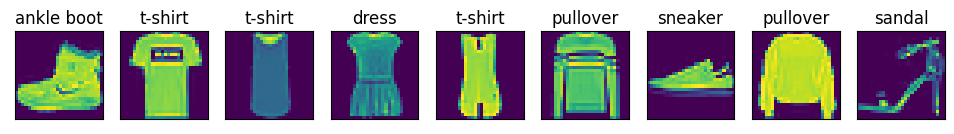

In [65]:
x = [train_set[i][0] for i in range(9)]
y = [train_set[i][1] for i in range(9)]
labels = get_fashion_mnist_labels(y)

show_fashion_mnist(x, labels, transform)

### 2.5.2 读取小批量

我们将在训练数据集上训练模型，并将训练好的模型在测试数据集上评价模型的表现。虽然我们可以像上⼀节中那样通过`yield`来定义读取小批量数据样本的函数，但为
了代码简洁，这⾥我们直接调用`pytorch`提供的`DataLoader`实例。该实例每次读取⼀个样本数为`batch_size`的小批量数据。这⾥的批量⼤小`batch_size`是⼀个超参数。在实践中，数据读取经常是训练的性能瓶颈，特别当模型较简单或者计算硬件性能较⾼时。`Pytorch`的`DataLoader`中⼀个很⽅便的功能是允许使⽤多进程来加速数据读取,这⾥我们通过参数`num_workers`来设置4个进程读取数据。

In [69]:
from torch.utils.data import DataLoader

batch_size = 256
train_DataLoader = DataLoader(train_set, batch_size=batch_size, 
                              shuffle=True,num_workers=4)
test_DataLoader = DataLoader(test_set, batch_size=batch_size, 
                              shuffle=True,num_workers=4)

下面我们查看读取一遍训练数据需要的时间。

In [70]:
import time

start = time.time()
for x, y in train_DataLoader:
    continue
    
print('%.2f sec' % (time.time() - start))

1.66 sec


我们可以改变批处理大小，然后再次观察读取时间，实验可以发现，随着批处理的数据规模越小，读取时间将会增加。

## 2.6 从零开始实现`softmax`回归

接下来我们开始动手实现`softmax`回归。

### 2.6.1 获取和批量读取数据

下面，为了使代码简介，我们编写一个批量读取`Fashion-MNIST`数据集的方法。

In [12]:
import torch, torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

transform=transforms.Compose([
        transforms.ToTensor()
    ])

def load_fashion_mnist_with_batch(transform, batch_size):
    train_set = torchvision.datasets.FashionMNIST(
        root='./data/FashionMNIST',
        train=True,
        download=True,
        transform=transform
    )

    test_set = torchvision.datasets.FashionMNIST(
        root='./data/FashionMNIST',
        train=False,
        download=True,
        transform=transform
    )
    
    train_DataLoader = DataLoader(train_set, batch_size=batch_size, 
                              shuffle=True,num_workers=0)
    test_DataLoader = DataLoader(test_set, batch_size=batch_size, 
                              shuffle=True,num_workers=0)
    return train_DataLoader, test_DataLoader

下面使用`load_fashion_mnist_with_batch`进行数据的读取。

In [13]:
batch_size = 256

train_DataLoader, test_DataLoader = load_fashion_mnist_with_batch(
    transform, batch_size)

### 2.6.2 初始化模型参数

跟线性回归中的例⼦⼀样，我们将使⽤向量表⽰每个样本。已知每个样本输⼊是⾼和宽均为`28`像素的图像。模型的输⼊向量的⻓度是`28 × 28 = 784`：该向量的每个元素对应图像中每个像素。由于图像有`10`个类别，单层神经⽹络输出层的输出个数为`10`，因此`softmax`回归的权重和偏差参数分别为`784 × 10`和`1 × 10`的矩阵。

In [14]:
num_inputs = 784
num_outputs = 10

w = torch.normal(mean=0.,std=1, size=(num_inputs, num_outputs), 
                 requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

与之前一样，我们要为模型参数开启梯度需求。

In [15]:
w.requires_grad = True
b.requires_grad = True

### 2.6.3 实现`softmax`运算

在介绍如何定义`softmax`回归之前，我们先描述⼀下对如何对多维`Tensor`按维度操作。在下⾯的例⼦中，给定⼀个`Tensor`矩阵`tensorX`。我们可以只对其中同⼀列(`axis=0`)或同⼀⾏(`axis=1`)的元素求和，并在结果中保留⾏和列这两个维度(`keepdims=True`)。

In [158]:
tensorX = torch.tensor([[10, 11, 12], [11, 12, 13]])
tensorX.sum(axis=0, keepdims=True), tensorX.sum(axis=1, keepdims=True)

(tensor([[21, 23, 25]]),
 tensor([[33],
         [36]]))

下⾯我们就可以定义前⾯介绍的`softmax`运算了。在下⾯的函数中，矩阵`X`的⾏数是样本数，列数是输出个数。为了表达样本预测各个输出的概率，`softmax`运算会先通过`exp`函数对每个元素做指数运算，再对`exp`矩阵同⾏元素求和，最后令矩阵每⾏各元素与该⾏元素之和相除。这样⼀来，最终得到的矩阵每⾏元素和为`1`且⾮负。因此，该矩阵每⾏都是合法的概率分布。`softmax`运算的输出矩阵中的任意⼀⾏元素代表了⼀个样本在各个输出类别上的预测概率。

计算公式见前文`softmax运算`。

In [16]:
def softmax(X):
    exp_X = X.exp()
    partition = exp_X.sum(axis=1, keepdims=True)
    return exp_X / partition  # 这里使用了广播机制

下面我们通过一个例子观察该函数的计算实例。首先，该函数会将输入数据通过以`e`为底的指数函数运算将所有元素转为非负数，之后归一化在`0~1`之间，且每一行之和为`1`。

In [160]:
X = torch.normal(mean=0., std=1, size=(2, 4))
prob_X = softmax(X)
prob_X, prob_X.sum(axis=1)

(tensor([[0.3121, 0.2097, 0.1738, 0.3044],
         [0.1293, 0.3005, 0.1132, 0.4570]]),
 tensor([1., 1.]))

### 2.6.4 定义模型

有了`softmax`运算，我们可以定义上节描述的`softmax`回归模型了。这⾥通过`reshape`函数将每张原始图像改成⻓度为`num_inputs`的向量，即将数据展平。

In [17]:
def net(X):
    return softmax(torch.mm(X.reshape(-1, w.shape[0]), w) + b)

### 2.6.5 定义损失函数

上⼀节中，我们介绍了`softmax`回归使⽤的交叉熵损失函数。为了得到标签的预测概率，我们可以使⽤`Pytorch`中的`gather`函数。在下⾯的例⼦中，变量`y_hat`是`2`个样本在`3`个类别的预测概率，变量`y`是这`2`个样本的标签类别。通过使⽤`gather`函数，我们得到了`2`个样本的标签的预测概率。与“softmax回归”⼀节数学表述中标签类别离散值从`1`开始逐⼀递增不同，在代码中，标签类别的离散值是从`0`开始逐⼀递增的。

In [19]:
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y = torch.tensor([0, 2])

y = y.view(-1, 1)
y_hat.gather(1, y)

tensor([[0.1000],
        [0.5000]])

下面开始实现`softmax回归`中介绍的交叉熵函数，如下公式：

$$
H(\pmb{y}^i,\pmb{\hat{y}}^i)=-\sum^q_{j=1}y_j^i log\hat{y}_j^i
$$

In [20]:
def cross_entropy(y_hat, y):
    return -y_hat.gather(1, y.view(-1, 1)).log()

cross_entropy(y_hat, y)

tensor([[2.3026],
        [0.6931]])

### 2.6.6 计算分类准确率

给定⼀个类别的预测概率分布`y_hat`，我们把预测概率最⼤的类别作为输出类别。如果它与真实类别`y`⼀致，说明这次预测是正确的。**分类准确率即正确预测数量与总预测数量之⽐**。

为了演⽰准确率的计算，下⾯定义准确率`accuracy`函数。其中`y_hat.argmax(axis=1)`返回矩阵`y_hat`每⾏中最⼤元素的索引，且返回结果与变量y形状相同。我们在“数据操作”⼀节介绍过，相等条件判断式`(y_hat.argmax(axis=1)== y)`是⼀个值为`0`(相等为假)或`1`(相等为真)的数组。由于标签类型为整数，我们先将变量`y`变换为浮点数再进⾏相等条件判断。

In [21]:
def accuracy(y_hat, y):
    return (y_hat.argmax(axis=1)==y).type(torch.float32).mean().item()

下面我们继续使用变量`y_hat`和`y`，并将它们分别作为预测概率分布和标签。可以看到，第⼀个样本预测类别为`2`(该⾏最⼤元素`0.6`在本⾏的索引为`2`)，与真实标签`0`不⼀致；第⼆个样本预测类别为`2`(该⾏最⼤元素`0.5`在本⾏的索引为`2`)，与真实标签`2`⼀致。因此，这两个样本上的分类准确率为`0.5`。

In [145]:
accuracy(y_hat, y)

0.5

类似地，我们可以评价模型`net`在数据集`data_iter`上的准确率。

In [22]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for x, y in data_iter:
        acc_sum += (net(x).argmax(axis=1)==y).type(torch.float32).sum().item()
        n += y.shape[0]
    return acc_sum / n

因为我们随机初始化了模型`net`，所以这个随机模型的准确率应该接近于类别个数`10`的倒数`0.1`。

In [147]:
evaluate_accuracy(test_DataLoader, net)

0.1107

### 2.6.7 训练模型

训练`softmax`回归的实现跟前面的`线性回归实现`介绍的线性回归中的实现非常相似。我们同样使用小批量随机梯度下降来优化模型的损失函数。在训练模型时，迭代周期数`num_epochs`和学习率`lr`都是可以调的超参数。改变它们的值可能会得到分类更准确的模型。

In [23]:
from torch import nn

# criterion = nn.MSELoss()

num_epochs, lr = 10, 0.1

def SGD(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size,
             params=None, lr=None, optimizer=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for x, y in train_iter:
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
                    
            y_hat = net(x)
            l = loss(y_hat, y).sum()
            l.backward()
            
            if optimizer is None:
                SGD(params, lr, batch_size)
            else:
                optimizer.step()
            
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1)==y).type(torch.float32).sum().item()
            n += y.shape[0]
            
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
             % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))
        
train_ch3(net, train_DataLoader, test_DataLoader, cross_entropy, num_epochs, 
          batch_size, [w, b], lr)

epoch 1, loss 3.3657, train acc 0.463, test acc 0.596
epoch 2, loss 1.7014, train acc 0.646, test acc 0.657
epoch 3, loss 1.4290, train acc 0.691, test acc 0.688
epoch 4, loss 1.2818, train acc 0.715, test acc 0.707
epoch 5, loss 1.1850, train acc 0.730, test acc 0.720
epoch 6, loss 1.1135, train acc 0.743, test acc 0.732
epoch 7, loss 1.0580, train acc 0.751, test acc 0.737
epoch 8, loss 1.0133, train acc 0.759, test acc 0.743
epoch 9, loss 0.9770, train acc 0.764, test acc 0.752
epoch 10, loss 0.9446, train acc 0.769, test acc 0.752


### 2.6.8 预测

训练完成后，接下来我们就执行图像分类实例。通过给定的部分图像，我们展示预测标签、真实标签以及图片，其中，第一行代表真实标签，第二行表示预测标签，第三行展示图片。

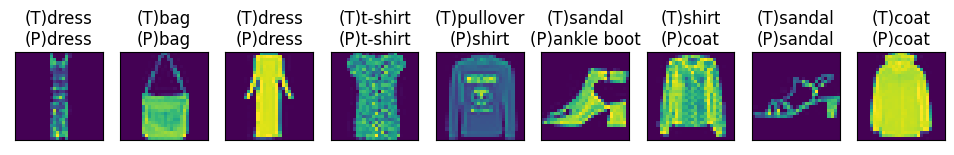

In [7]:
import d2l.utils as d2l

for x, y in test_DataLoader:
    break
    
true_labels = d2l.get_fashion_mnist_labels(y)
pred_labels = d2l.get_fashion_mnist_labels(net(x).argmax(axis=1))

titles = ['(T)' + true + '\n' + '(P)' + pred for true, pred in 
          zip(true_labels, pred_labels)]

show_image = [x[i] for i in range(9)]
# titles[0:9]
d2l.show_fashion_mnist(show_image, titles[0:9], transform)

**小结**

可以使⽤`softmax`回归做多类别分类。与训练线性回归相⽐，你会发现训练`softmax`回归的步骤和它⾮常相似：获取并读取数据、定义模型和损失函数并使⽤优化算法训练模型。事实上，绝⼤多数深度学习模型的训练都有着类似的步骤。

## 2.7 Softmax回归的简洁实现

前面我们在“线性回归的简洁实现”一节中已经了解了使用`Pytorch`实现模型的便利。下面我们也将使用`Pytorch`来实现`softmax`模型。

需要注意的是，其中部分函数我们已经定义在`d2l`中，因此我们可以直接导入并调用。

### 2.7.1 获取和读取数据

我们仍然使用`Fashion-MNIST`数据集和前面所使用的批量大小。

In [1]:
import torchvision.transforms as transforms
import d2l.utils as d2l

batch_size = 256

transform = transforms.Compose([
    transforms.ToTensor()
])

train_DataLoader, test_DataLoader = d2l.load_fashion_mnist_with_batch(transform, batch_size)

### 2.7.2 定义和初始化模型

在“softmax回归”一节中我们提到，`softmax`回归的输出层是一个全连接层。因此，我们需要添加一个输出为`10`的全连接层(为什么是`10`个输出，这是有特定情况决定，在`Fashion-MNIST`数据集中有十个种类)。

此外，对于`pytorch`而言，我们进行网络定义时需要进行明确的输入输出说明，而无法由框架推导。对于本节中的`Fashion-MNIST`而言，其形状为`(28,28)`大小，因此展平后输入为`28*28=784`。

最后，我们对于全连接层正向计算时需要对输入数据进行展平，因此我们需要定义一个全连接类。

在权重初始化上，我们使用均值为`0`、标准差为`0.01`的正态分布随机初始化。

In [2]:
from torch import nn
import torch

class FCN(nn.Module):
    def __init__(self, input_size, output_size):
        super(FCN, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        return self.linear(x.view(x.shape[0], -1))

input_size = 784
output_size = 10
net = nn.Sequential()
net.add_module('Linear1',FCN(input_size, output_size))

for module in net.modules():
    if isinstance(module, nn.Linear):
        module.weight.data.normal_(mean=0, std=0.01)
        module.bias.data.fill_(0.0)

### 2.7.3 softmax和交叉熵损失函数

前面我们使用了自定义的交叉熵损失函数来进行运算，下面我们使用`pytorch`定义的交叉熵损失函数和`softmax`函数进行训练。

>此时需要特别注意，在我们自行定义时，我们需要在交叉熵损失函数输出后将其输入`softmax`进行输出。在`pytorch`中，交叉熵损失函数就已经包含了`softmax`归一化操作。

In [3]:
loss = nn.CrossEntropyLoss()

### 2.7.4 定义优化函数

与上面一样，我们使用学习率为`0.1`的小批量随机梯度下降作为优化器。

In [4]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.1)

### 2.7.5 训练模型

接下面，我们使用之前定义的训练函数来训练模型。

In [5]:
num_epoches = 5
d2l.train_ch3(net, train_DataLoader, test_DataLoader, loss, 
              num_epoches, batch_size, optimizer=optimizer)

epoch 1, loss 0.0031, train acc 0.748, test acc 0.776
epoch 2, loss 0.0022, train acc 0.812, test acc 0.811
epoch 3, loss 0.0021, train acc 0.825, test acc 0.817
epoch 4, loss 0.0020, train acc 0.832, test acc 0.822
epoch 5, loss 0.0019, train acc 0.837, test acc 0.824


## 2.8 多层感知机

前面我们已经介绍了线性回归和`softmax`回归这样的单层神经网络。但目前的机器学习主要贡献者在于深度学习，而深度学习算法的主要关注是多层模型。在本小节中，我们将以多层感知机(`Multilayer Perceptron, MLP`)为例，介绍多层神经网络的概念。

### 2.8.1 隐藏层

多层感知机在单层神经网络的基础上引入了一个到多个隐藏层(`hidden layer`)。该层位于输入层和输出层之间。下图展示了一个多层感知机的神经网络图。

![img2-8-1](./images/2-8-1.png)

在上图中，输⼊和输出个数分别为`4`和`3`，中间的隐藏层中包含了`5`个隐藏单元
(`hidden unit`)。由于输⼊层不涉及计算，图中的多层感知机的层数为`2`。由上图可知，隐藏层中的神经元和输⼊层中各个输⼊完全连接，输出层中的神经元和隐藏层中的各个神经元也完全连接。因此，多层感知机中的隐藏层和输出层都是全连接层。

我们使用一个具体的案例，假设给定一个小批量样本$\pmb{X}\in\mathcal{R}^{n\times d}$，其批量大小为`n`，输入个数为`d`。以上图多层感知机为例，只有一个隐藏层，假设隐藏单元个数为`h`。记隐藏层的输出为$\pmb{H}$，则有$\pmb{H}\in\mathcal{R}^{n\times h}$。由于隐藏层和输出层均为全连接层，可以设隐藏层的权重参数和偏差参数分别为$\pmb{W}_h\in\mathcal{R}^{d\times h}$和$\pmb{b}_h\in\mathcal{R}^{1\times h}$，输出层的权重和偏差参数分别为$\pmb{W}_o\in\mathcal{R}^{h\times q}$和$\pmb{b}_o\in\mathcal{R}^{1\times q}$。

根据单层神经网络计算法则，我们可以按步骤来进行计算最终输出。因此可以计算最终输出$\pmb{O}\in\mathcal{R}^{n\times q}$的计算为:

$$
\pmb{H}=\pmb{XW}_h+\pmb{b}_h,\\
\pmb{O}=\pmb{HW}_o+\pmb{b}_o
$$

下面我们将隐藏层的输出直接作为输出层的输⼊，将以上两个式⼦联⽴起来，可以得到：

$$
\pmb{O}=(\pmb{XW}_h+\pmb{b}_h)\pmb{W}_o+\pmb{b}_o=\pmb{XW}_h\pmb{W}_o+\pmb{b}_h\pmb{W}_o+\pmb{b}_o
$$

从联⽴后的式⼦可以看出，虽然神经⽹络引⼊了隐藏层，却依然等价于⼀个单层神经⽹络：其中输出层权重参数为$\pmb{W}_h \pmb{W}_o$，偏差参数为$\pmb{b}_h\pmb{W}_o+\pmb{b}_o$。不难发现，即便再添加更多的隐藏层，以上
设计依然只能与仅含输出层的单层神经⽹络等价。

### 2.8.2 激活函数

上述问题的根源在于全连接层只是对数据做仿射变换(`affine transformation`)，而多个仿射变换的叠加仍然是⼀个仿射变换。解决问题的⼀个⽅法是引⼊⾮线性变换，例如对隐藏变量使⽤按元素运算的⾮线性函数进⾏变换，然后再作为下⼀个全连接层的输⼊。这个⾮线性函数被称为激活函数(`activation function`)。下⾯介绍⼏个常⽤的激活函数。

**ReLU函数**

`ReLU(rectified linear unit)`函数提供了⼀个很简单的⾮线性变换。给定元素`x`，该函数定义为:

$$
ReLU(x)=max(x,0)
$$

可以看出，`ReLU`函数只保留正数元素，并将负数元素清零。为了直观地观察这⼀⾮线性变换，我们下面通过`ReLU`计算并绘图来进一步了解其具体的情况。

首先定义绘图函数：

In [13]:
import matplotlib.pyplot as plt

def funcPlot(x_vals, y_vals, funcName):
    plt.figure(figsize=(5, 2.5))
    plt.plot(x_vals.detach().numpy(), y_vals.detach().numpy())
    plt.xlabel('x')
    plt.ylabel(funcName + '(x)')
    plt.show()

下面使用`pytorch`中提供的`relu`函数来绘制`ReLU`函数图像。

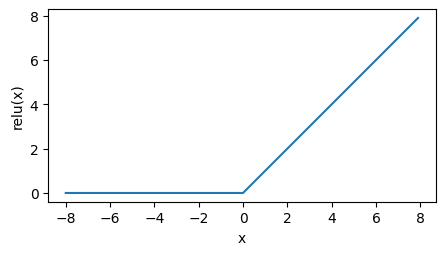

In [30]:
import torch
import torch.nn as nn

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
relu = nn.ReLU()
y = relu(x)

funcPlot(x, y, 'relu')

从上图可以看到，该激活函数是⼀个两段线性函数。并且我们可以很清晰的看到，当输⼊为负数时，`ReLU`输出为`0`；当输入为正数时，`ReLU`将原值输出。

与此对应，当输入为负数时，`ReLU`函数的导数为`0`；当输⼊为正数时，`ReLU`函数的导数为`1`。尽管输⼊为`0`时`ReLU`函数不可导，但是我们可以取此处的导数为`0`。下⾯绘制`ReLU`函数的导数。

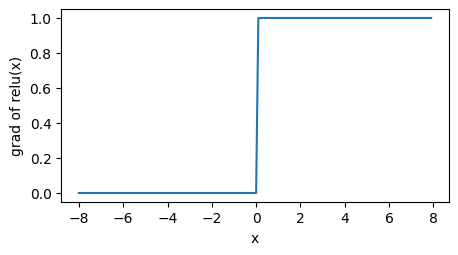

In [27]:
y.backward(torch.ones_like(y))
funcPlot(x, x.grad, 'grad of relu')

**sigmoid函数**

`sigmoid`函数可以将元素的值变换到`0`和`1`之间：

$$
sigmoid(x)=\frac{1}{1+e^{-x}}
$$

`sigmoid`函数在早期的神经⽹络中较为普遍，但它⽬前逐渐被更简单的`ReLU`函数取代。在后⾯“循环神经⽹络”⼀章中我们会介绍如何利⽤它值域在`0`到`1`之间这⼀特性来控制信息在神经⽹络中的流动。下⾯绘制了`sigmoid`函数。当输⼊接近`0`时，`sigmoid`函数变化接近线性变化。

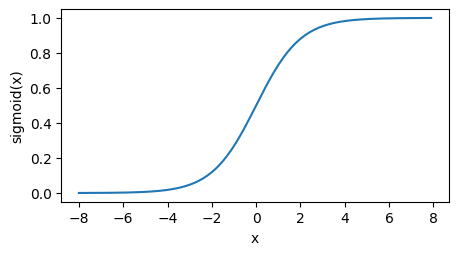

In [31]:
sigmoid = nn.Sigmoid()
y = sigmoid(x)

funcPlot(x, y, 'sigmoid')

依据链式法则，`sigmoid`函数的导数:

$$
sigmoid'(x)=sigmoid(x)(1-sigmoid(x))
$$

下⾯绘制了`sigmoid`函数的导数。当输⼊为`0`时，`sigmoid`函数的导数达到最⼤值`0.25`；当输⼊越偏离`0`时，`sigmoid`函数的导数越接近`0`。

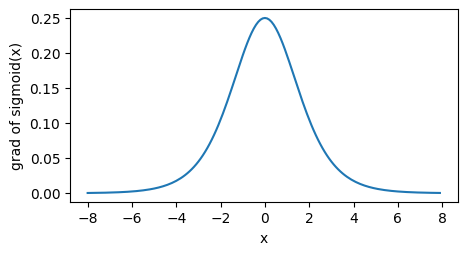

In [32]:
y.backward(torch.ones_like(y))
funcPlot(x, x.grad, 'grad of sigmoid')

**tanh函数**

`tanh`(双曲正切)函数可以将元素的值变换到`-1`和`1`之间，其函数定义如下：

$$
tanh(x)=\frac{1-e^{-2x}}{1+e^{-2x}}
$$

接下来绘制`tanh`函数。当输⼊接近`0`时，`tanh`函数接近线性变换。虽然该函数的形状和`sigmoid`函数的形状很像，但`tanh`函数在坐标系的原点上对称。


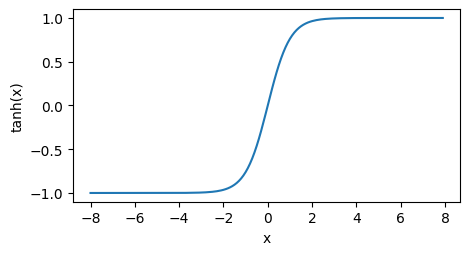

In [33]:
tanh = nn.Tanh()
y = tanh(x)

funcPlot(x, y, 'tanh')

依据链式法则，`tanh`函数的导数如下所示：

$$
tanh'(x)=1-tanh^2(x)
$$

下⾯绘制了`tanh`函数的导数。当输⼊为`0`时，`tanh`函数的导数达到最⼤值`1`；当输⼊越偏离`0`时，`tanh`函数的导数越接近`0`。

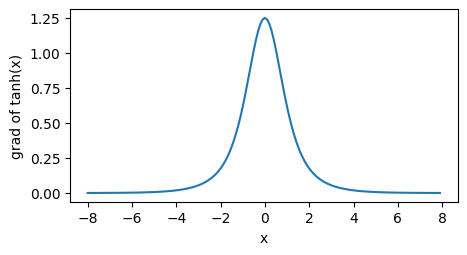

In [34]:
y.backward(torch.ones_like(y))
funcPlot(x, x.grad, 'grad of tanh')

### 2.8.3 多层感知机

多层感知机实质是一个含有⾄少⼀个隐藏层的由全连接层组成的神经⽹络，且每个隐藏层的输出通过激活函数进⾏变换。多层感知机的层数和各隐藏层中隐藏单元个数都是超参数。以单隐藏层为例并沿⽤本节之前定义的符号，多层感知机按以下⽅式计算输出：

$$
\pmb{H}=\phi(\pmb{XW}_h+\pmb{b}_h),\\
\pmb{O}=\pmb{HW}_o+\pmb{b}_o
$$

其中$\phi$表⽰激活函数。在分类问题中，我们可以对输出$\pmb{O}$做`softmax`运算，并使⽤`softmax`回归中的交叉熵损失函数。在回归问题中，我们将输出层的输出个数设为`1`，并将输出$\pmb{O}$直接提供给线性回归中使⽤的平⽅损失函数。

## 2.9 从零开始实现多层感知机

我们已经从上⼀节⾥了解了多层感知机的原理。下⾯，我们⼀起来动⼿实现⼀个多层感知机。

### 2.9.1 获取和读取数据

在这里，我们继续使用`Fashion-MNIST`数据集，并使用多层感知机对数据集中的图像进行分类。


In [26]:
import torchvision.transforms as transforms
import d2l.utils as d2l

batch_size = 256

transform = transforms.Compose([
    transforms.ToTensor()
])

train_DataLoader, test_DataLoader = d2l.load_fashion_mnist_with_batch(transform, batch_size)


### 2.9.2 定义模型参数

我们在“从零开始实现`softmax`回归”⼀节⾥已经介绍了，`Fashion-MNIST`数据集中图像形状为`28 × 28`，类别数为`10`。本节中我们依然使⽤⻓度为`28 × 28 = 784`的向量表⽰每⼀张图像。因此，输⼊个数为`784`，输出个数为`10`。实验中，我们设超参数隐藏单元个数为`256`。

In [27]:
import torch

num_inputs, num_outputs, num_hiddens = 784, 10, 256

w1 = torch.normal(mean=0.0, std=1, size=(num_inputs, num_hiddens))
b1 = torch.zeros(num_hiddens)
w2 = torch.normal(mean=0.0, std=1, size=(num_hiddens, num_outputs))
b2 = torch.zeros(num_outputs)

params = [w1, b1, w2, b2]

for param in params:
    param.requires_grad_(True)

### 2.9.3 定义激活函数

这⾥我们使⽤基础的`maximum`函数来实现`ReLU`，而⾮直接调⽤`relu`函数。

In [28]:
def relu(x):
    return torch.maximum(x, torch.tensor([0.0]))

### 2.9.4 定义模型

同`softmax`回归⼀样，我们通过`reshape`函数将每张原始图像改成⻓度为`num_inputs`的向量。然后我们实现上⼀节中多层感知机的计算表达式。

In [29]:
def net(x):
#     x = x.reshape(-1, num_inputs)
    x = x.reshape(x.shape[0], -1)
    H = relu(torch.mm(x, w1) + b1)
    return torch.mm(H, w2) + b2

### 2.9.5 定义损失函数

为了得到更好的数值稳定性，我们直接使⽤`pytorch`提供的包括交叉熵损失计算函数。

In [30]:
import torch.nn as nn

loss = nn.CrossEntropyLoss()

### 2.9.6 训练模型

训练多层感知机的步骤和“从零开始实现`softmax`回归”⼀节中训练`softmax`回归的步骤没什么区别。我们直接调⽤`d2l`包中的`train_ch3`函数，它的实现已经在“从零开始实现`softmax`回归”⼀节⾥介绍过。我们在这⾥设超参数迭代周期数为`5`，学习率为`0.5`。

In [31]:
num_epochs, lr = 5, 0.5
d2l.train_ch3(net, train_DataLoader, test_DataLoader, loss,
              num_epochs, batch_size, params, lr)

epoch 1, loss 0.2407, train acc 0.314, test acc 0.471
epoch 2, loss 0.0937, train acc 0.543, test acc 0.577
epoch 3, loss 0.0735, train acc 0.608, test acc 0.618
epoch 4, loss 0.0635, train acc 0.640, test acc 0.643
epoch 5, loss 0.0570, train acc 0.662, test acc 0.657


## 2.10 多层感知机的简洁实现

下面我们使用`pytorch`来简单实现多层感知机内容。

### 2.10.1 定义模型

与`softmax`回归唯⼀的不同在于，我们多加了⼀个全连接层作为隐藏层。它的隐藏单元个数为`256`，并使⽤`ReLU`函数作为激活函数。

>在`pytorch`中，网络模型拥有自定义的初始化参数方式，因此如非必要，可以省略网络模型参数初始化步骤。

In [36]:
import torch.nn as nn

num_inputs, num_outputs, num_hiddens = 784, 10, 256

class MLP(nn.Module):
    def __init__(self, num_inputs, num_hiddens, num_outputs):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(num_inputs, num_hiddens)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(num_hiddens, num_outputs)
        
    def forward(self, x):
        return self.linear2(self.relu(self.linear1(x.reshape(x.shape[0], -1))))
net = MLP(num_inputs, num_hiddens, num_outputs)


### 2.10.2 读取数据并训练模型

该步骤与“softmax回归的简洁实现”⼀节中训练`softmax`回归⼏乎相同。

In [37]:
import d2l.utils as d2l
import torchvision.transforms as transforms
import torch.optim as optim

batch_size = 256
num_epochs = 5
transform = transforms.Compose([
    transforms.ToTensor()
])

train_DataLoader, test_DataLoader = d2l.load_fashion_mnist_with_batch(transform, batch_size)
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.5)
d2l.train_ch3(net, train_DataLoader, test_DataLoader, loss, num_epochs, 
             batch_size, None, None, optimizer)

epoch 1, loss 0.0029, train acc 0.721, test acc 0.821
epoch 2, loss 0.0019, train acc 0.824, test acc 0.778
epoch 3, loss 0.0016, train acc 0.847, test acc 0.832
epoch 4, loss 0.0015, train acc 0.859, test acc 0.841
epoch 5, loss 0.0014, train acc 0.867, test acc 0.837


## 2.11 模型选择、欠拟合和过拟合

在前⼏节基于`Fashion-MNIST`数据集的实验中，我们评价了机器学习模型在训练数据集和测试数据集上的表现。如果我们改变过实验中的模型结构或者超参数，也许发现了：当模型在训练数据集上更准确时，它在测试数据集上却不⼀定更准确。这也是我们这一小节将要讨论的问题！

### 2.11.1 训练误差和泛化误差

在解释上述现象之前，我们进一步了解训练误差(`training error`)和泛化误差(`generalization error`)。通俗来讲，前者指模型在训练数据集上表现出的误差，后者指模型在任意⼀个测试数据样本上表现出的误差的期望，并常常通过测试数据集上的误差来近似。计算训练误差和泛化误差可以使⽤之前介绍过的损失函数，例如线性回归⽤到的平⽅损失函数和`softmax`回归⽤到的交叉熵损失函数。

让我们以考试为例来直观地解释训练误差和泛化误差这两个概念。训练误差可以认为是做L省考试试题时的错误率，泛化误差则可以通过参加其他省考试时的答题错误率来
近似。假设训练题和测试题都随机采样于⼀个未知的依照相同考纲的巨⼤试题库。如果让⼀名未学习中学知识的小学⽣去答题，那么测试题和训练题的答题错误率可能很相近。但如果换成⼀名反复练习训练题的⾼年级学生答题，即使在训练题上做到了错误率为0，也不代表真实的⾼考成绩会如此。

在机器学习⾥，我们通常假设训练数据集(训练题)和测试数据集(测试题)⾥的每⼀个样本都是从同⼀个概率分布中相互独⽴地⽣成的。基于该独⽴同分布假设，给定任意⼀个机器学习模型(含参数)，它的训练误差的期望和泛化误差都是⼀样的。例如，如果我们将模型参数设成随机值(小学⽣)，那么训练误差和泛化误差会⾮常相近。但我们从前⾯⼏节中已经了解到，模型的参数是通过在训练数据集上训练模型而学习出的，参数的选择依据了最小化训练误差(⾼年级学生)。所以，训练误差的期望小于或等于泛化误差。也就是说，⼀般情况下，由训练数据集学到的模型参数会使模型在训练数据集上的表现优于或等于在测试数据集上的表现。由于⽆法从训练误差估计泛化误差，⼀味地降低训练误差并不意味着泛化误差⼀定会降低。

机器学习模型应关注降低泛化误差。

### 2.11.2 模型选择

在机器学习中，通常需要评估若⼲候选模型的表现并从中选择模型。这⼀过程称为模型选择(`model selection`)。可供选择的候选模型可以是有着不同超参数的同类模型。以多层感知机为例，我们可以选择隐藏层的个数，以及每个隐藏层中隐藏单元个数和激活函数。为了得到有效的模型，我们通常要在模型选择上下⼀番功夫。下⾯，我们来描述模型选择中经常使⽤的验证数据集(`validation data set`)。